# ML_ python introduction & decision tree 2

### Data preprocessing

In [7]:
import pandas as pd

Documentation : https://pandas.pydata.org/docs/reference/index.html

In [8]:
# importing csv
data = pd.read_csv('assets/titanic.csv')

In [9]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [10]:
# dropping useless features
data.drop(labels=['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [11]:
# transforming columns
sex_ = {'male':1, 'female':0}
data['Sex'].replace(sex_, inplace=True)
embarked_ = {'C': 1, 'Q': 2, 'S': 3}
data['Embarked'].replace(embarked_, inplace=True)

In [12]:
# missing values processing
print(data.isnull().sum())

## 1. 
#data['Age'] = data['Age'].fillna(data['Age'].mean()).astype(int)
#data.dropna(inplace=True)
## 2.
data.dropna(inplace=True)

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64


In [13]:
data.shape

(712, 8)

In [14]:
# data consistency
data['Age'].value_counts()
data = data[(data['Age'] > 0) & (data['Age'] < 100)]

### Decision tree

In [15]:
# importing packages
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve

Documentation : https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn

In [16]:
# model variables definitions
y = data['Survived']
X = data.drop(labels=['Survived'], axis=1)

In [17]:
# splitting into train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42) 

In [18]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
703,3,1,25.0,0,0,7.7417,2.0
462,1,1,47.0,0,0,38.5000,3.0
858,3,0,24.0,0,3,19.2583,1.0
429,3,1,32.0,0,0,8.0500,3.0
811,3,1,39.0,0,0,24.1500,3.0
...,...,...,...,...,...,...,...
93,3,1,26.0,1,2,20.5750,3.0
135,2,1,23.0,0,0,15.0458,1.0
338,3,1,45.0,0,0,8.0500,3.0
549,2,1,8.0,1,1,36.7500,3.0


In [19]:
# calling decisiontree classifier
clf = DecisionTreeClassifier()
# fitting on data
clf = clf.fit(X_train, y_train)

In [20]:
# estimating on test
estimate = clf.predict(X_test)

In [21]:
# average diffence estimation true values
print(abs(y_test - estimate).mean())
print((y_test - estimate).std())

0.29213483146067415
0.5390837709772227


#### Classification evaluation

In [22]:
# accuracy
accuracy_score(y_test, estimate, normalize=True, sample_weight=None)


0.7078651685393258

In [23]:
import matplotlib.pyplot as plt

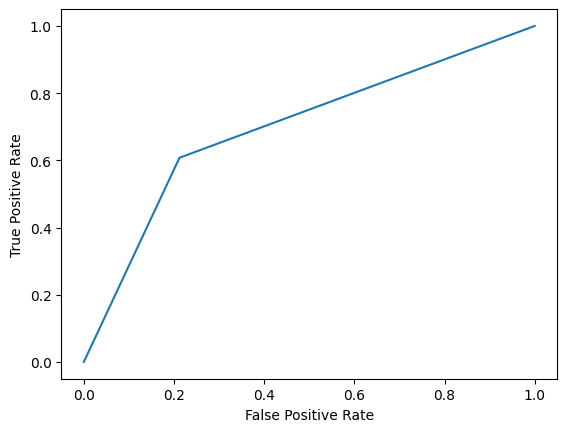

In [24]:
# ROC curve
fpr, tpr, _ = roc_curve(y_test,  estimate)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

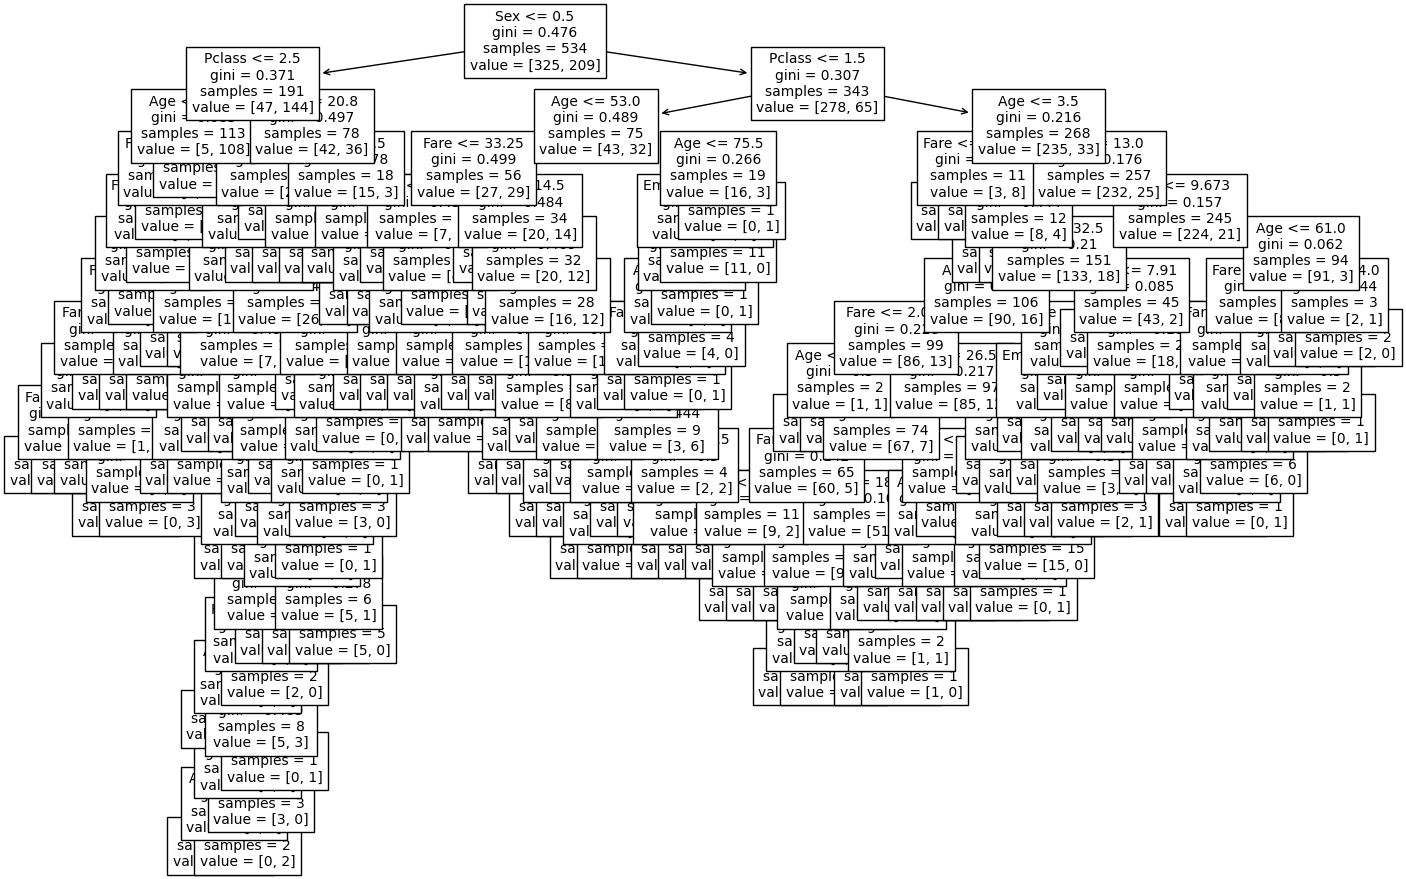

In [25]:
plt.figure(figsize=(17,11))
plot_tree(clf, feature_names = list(X_train.columns), fontsize=10)
plt.show()

####  modifying hyperparameters

In [26]:
# calling decisiontree classifier
clf_b = DecisionTreeClassifier(criterion= 'entropy', max_depth=5, min_samples_split=0.1)
# fitting on data
clf_b = clf_b.fit(X_train, y_train)
# estimating on test
estimate_b = clf_b.predict(X_test)
true = y_test
# average diffence estimation true values
print(abs(estimate_b - true).mean())
print((estimate_b - true).std())

0.2808988764044944
0.5314940034527339


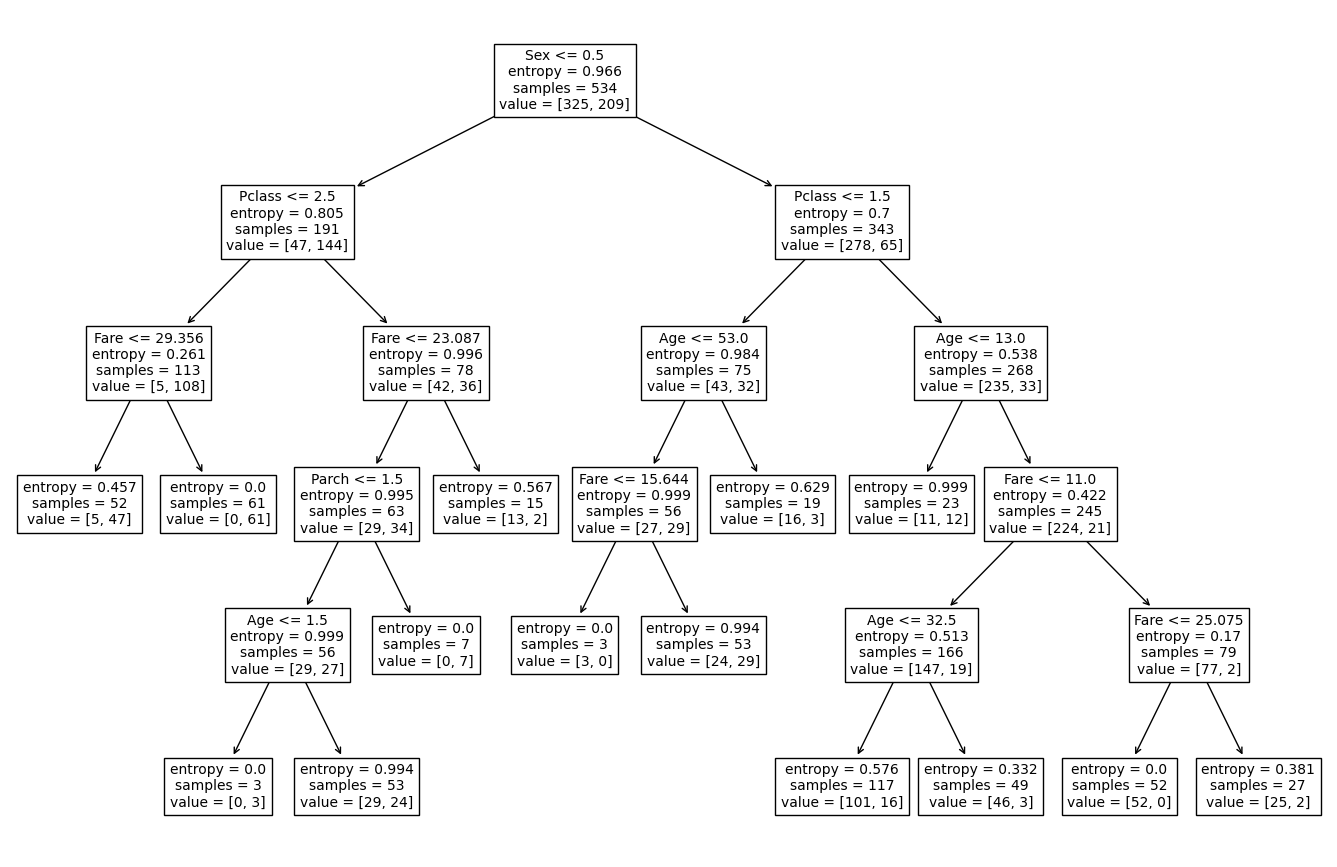

In [27]:
plt.figure(figsize=(17,11))
plot_tree(clf_b, feature_names = list(X_train.columns), fontsize=10)
plt.show()

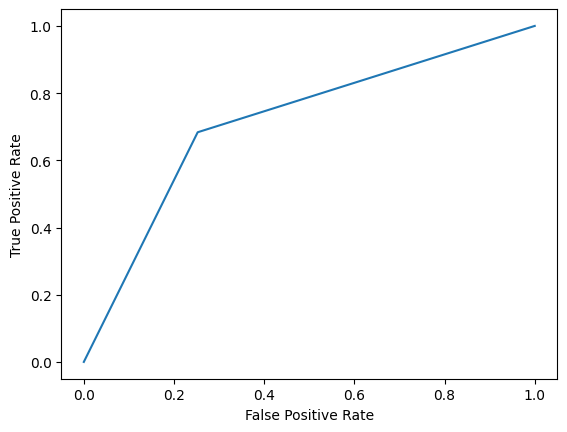

In [28]:
# ROC curve
fpr, tpr, _ = roc_curve(y_test,  estimate_b)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Hyperparameters optimization

In [29]:
for max_depth in range(2, 10):
    # calling decisiontree classifier
    clf_it = DecisionTreeClassifier(criterion= 'entropy', max_depth=max_depth, min_samples_split=0.1)
    # fitting on data
    clf_it = clf_it.fit(X_train, y_train)
    # estimating on test
    estimate_it = clf_it.predict(X_test)

    # accuracy
    accuracy = accuracy_score(y_test, estimate_it, normalize=True, sample_weight=None)
    
    print('max_depth: ' + str(max_depth))
    print('accuracy: ' + str(accuracy))

max_depth: 2
accuracy: 0.7584269662921348
max_depth: 3
accuracy: 0.7359550561797753
max_depth: 4
accuracy: 0.7191011235955056
max_depth: 5
accuracy: 0.7191011235955056
max_depth: 6
accuracy: 0.7191011235955056
max_depth: 7
accuracy: 0.7191011235955056
max_depth: 8
accuracy: 0.7191011235955056
max_depth: 9
accuracy: 0.7191011235955056


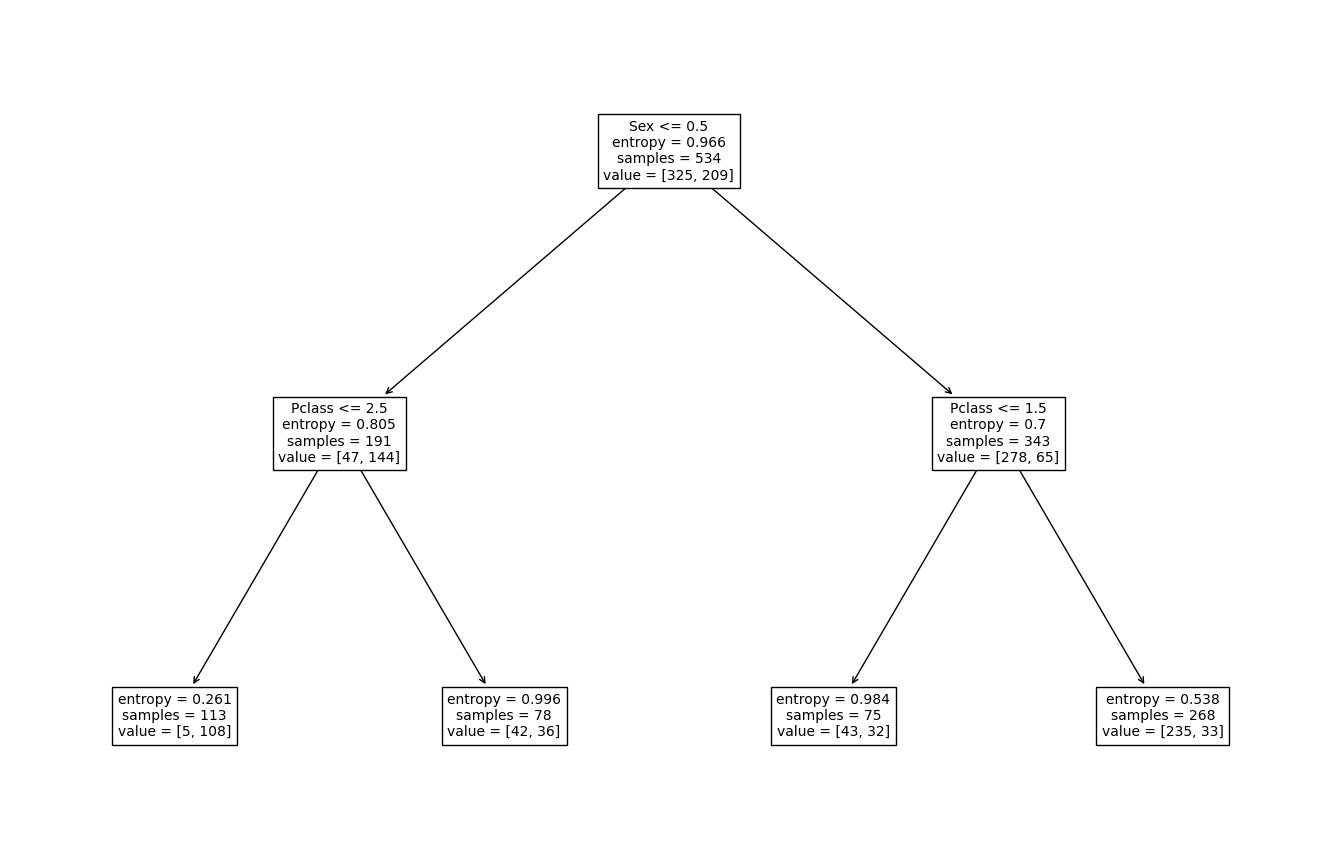

In [30]:
# plotting best tree
# calling decisiontree classifier
clf_b = DecisionTreeClassifier(criterion= 'entropy', max_depth=2, min_samples_split=0.1)
# fitting on data
clf_b = clf_b.fit(X_train, y_train)

plt.figure(figsize=(17,11))
plot_tree(clf_b, feature_names = list(X_train.columns), fontsize=10)
plt.show()

##### Grid search

In [31]:
from sklearn.model_selection import GridSearchCV

Hyperparameter space

In [32]:
param_space = {'criterion':[ 'entropy'], 
               'max_depth': list(range(2,10,1)),
               #'min_samples_split':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.],
               'min_samples_split':[0.01, 0.02, 0.03, 0.04, 0.05],
               'random_state': [42]}

calling classifier

In [33]:
clf_grid = DecisionTreeClassifier()

trainnig gridsearch on classifier

In [34]:
grid_search_tree = GridSearchCV(estimator=clf_grid,
                     param_grid=param_space,
                     scoring='accuracy',
                     cv=5)
# running search
grid_search_tree.fit(X, y.values)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [0.01, 0.02, 0.03, 0.04, 0.05],
                         'random_state': [42]},
             scoring='accuracy')

In [35]:
best_parameters = grid_search_tree.best_params_
best_accuracy = grid_search_tree.best_score_
print('best parameters: ' + str(best_parameters))
print('best accuracy: ' + str(best_accuracy))

best parameters: {'criterion': 'entropy', 'max_depth': 9, 'min_samples_split': 0.01, 'random_state': 42}
best accuracy: 0.8118487146656161


In [36]:
clf_grid.set_params(** best_parameters)
clf_grid.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_split=0.01,
                       random_state=42)

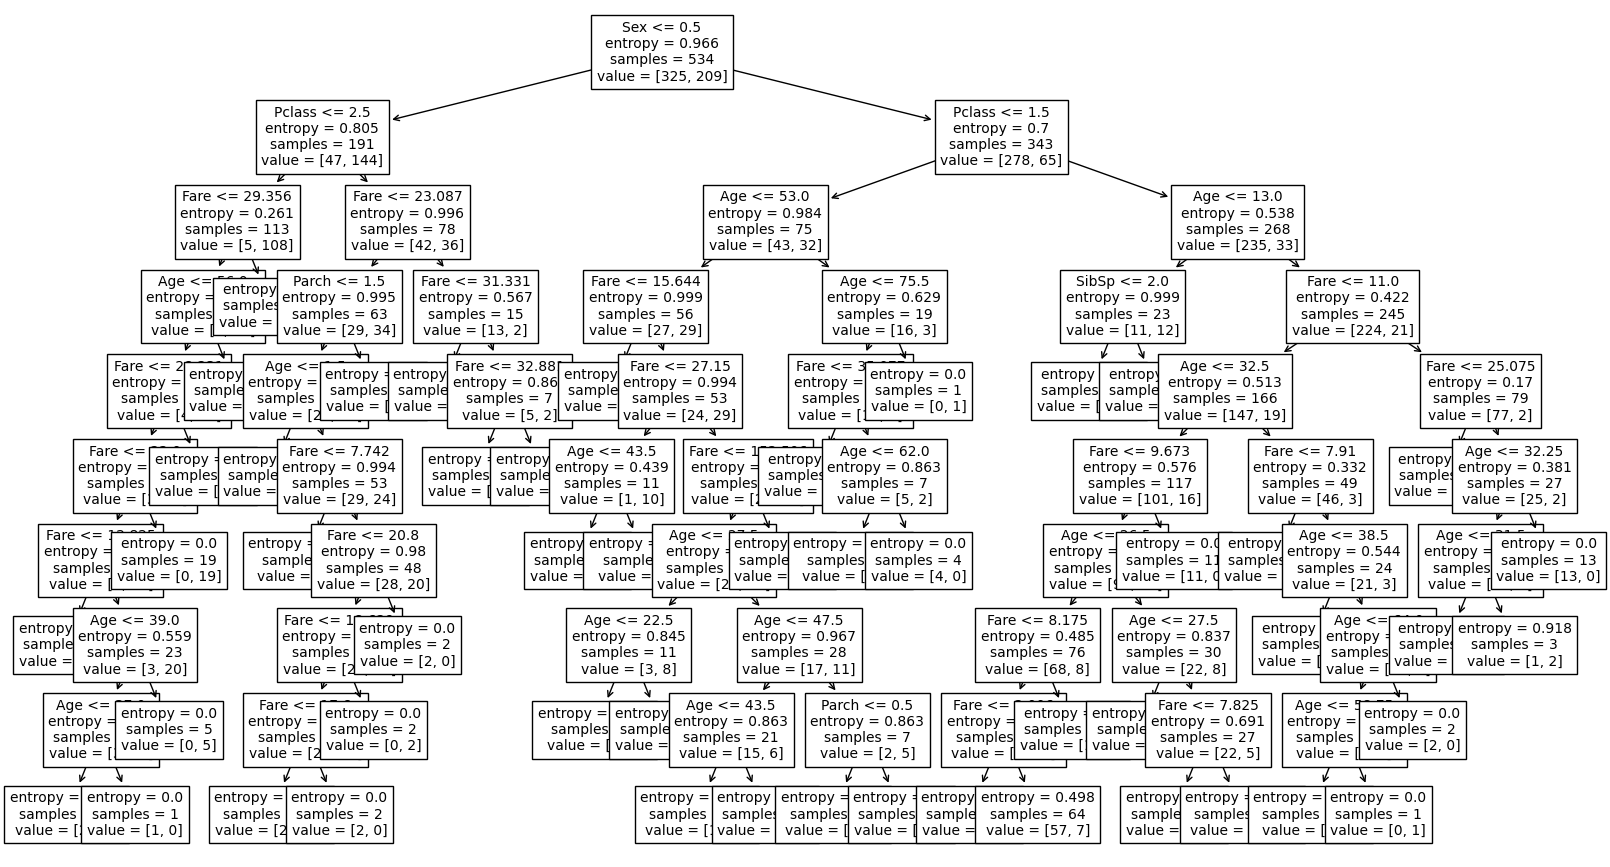

In [37]:
plt.figure(figsize=(20,11))
plot_tree(clf_grid, feature_names = list(X.columns), fontsize=10)
plt.show()

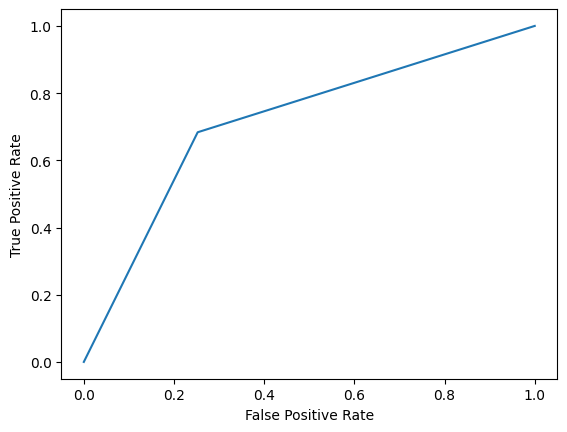

In [38]:
estimate_grid = clf_grid.predict(X_test)
# ROC curve
fpr, tpr, _ = roc_curve(y_test,  estimate_b)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

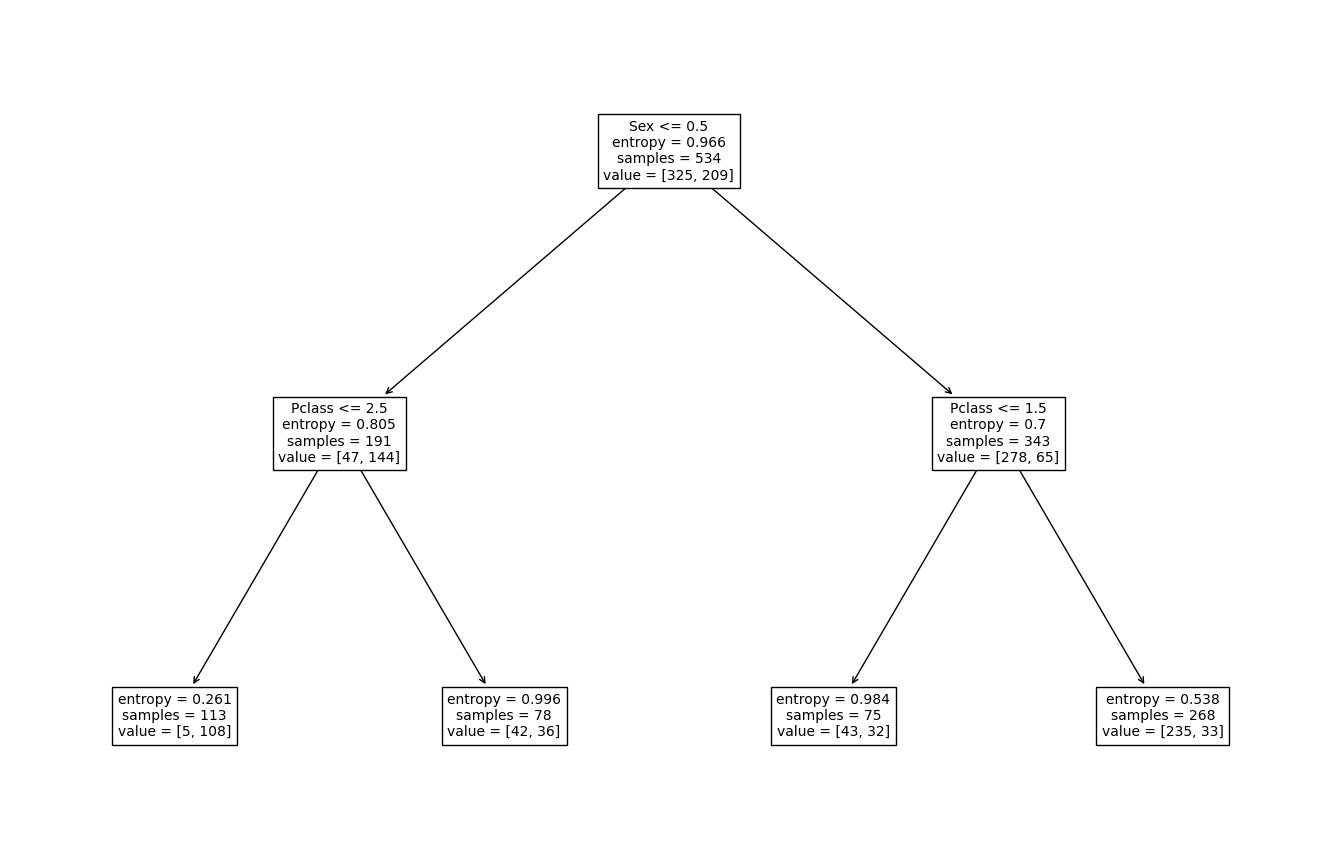

In [39]:
plt.figure(figsize=(17,11))
plot_tree(clf_b, feature_names = list(X_train.columns), fontsize=10)
plt.show()
#export_graphiz = None
#dd = export_graphviz(clf_b)
#graph = graphviz.Source(dd)

In [40]:
param_space2 = {'max_depth': list(range(2,10,1)),
               'min_samples_split':list(np.linspace(0.1, 1.0, 10, endpoint=True)),
               'max_features': list(range(6, X.shape[1])),
               'random_state': [0]}

NameError: name 'np' is not defined

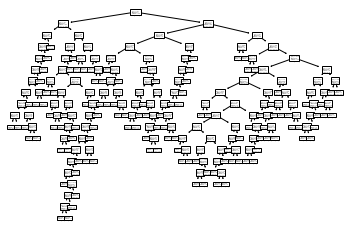

In [ ]:
plot_tree(clf)
export_graphiz = None